# Outlier detection with Isolation Forest

[Isolation Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.IsolationForest.html) is a decision-tree based ensemble algorithm for "isolating" outliers from the data set. From the scikit-learn documentation:

>The IsolationForest ‘isolates’ observations by randomly selecting a feature and then randomly selecting a split value between the maximum and minimum values of the selected feature.
>Since recursive partitioning can be represented by a tree structure, the number of splittings required to isolate a sample is equivalent to the path length from the root node to the terminating node.
>This path length, averaged over a forest of such random trees, is a measure of normality and our decision function.
>Random partitioning produces noticeably shorter paths for anomalies. Hence, when a forest of random trees.
collectively produce shorter path lengths for particular samples, they are highly likely to be anomalies.



### Define imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
%matplotlib inline

### Generate fake data

In [2]:
rng = np.random.RandomState(42)

# Generating training data 
X_train_np = 0.2 * rng.randn(1000, 2)
X_train_np = np.r_[X_train_np + 3, X_train_np]
X_train = pd.DataFrame(X_train_np, columns = ['x1', 'x2'])

# Generating outliers
X_outliers_np = rng.uniform(low=-1, high=5, size=(50, 2))
X_outliers = pd.DataFrame(X_outliers_np, columns = ['x1', 'x2'])

X_all = pd.concat([X_train, X_outliers], axis=0)

### Plot data

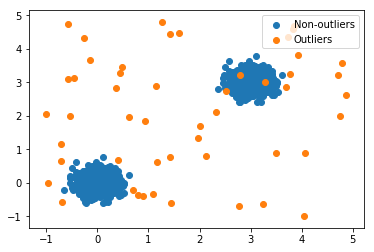

In [3]:
plt.scatter(X_train['x1'], X_train['x2'], label="Non-outliers")
plt.scatter(X_outliers['x1'], X_outliers['x2'], label="Outliers")
plt.legend(loc='upper right')

### Train the model and plot predictions

In [4]:
def train_and_plot(contamination='auto', **clf_kwargs):
    clf = IsolationForest(contamination=contamination, random_state=rng, behaviour='new', **clf_kwargs)
    clf.fit(X_all)

    # predictions
    y_pred_all = clf.predict(X_all)

    plt.scatter(X_all['x1'], X_all['x2'], c=y_pred_all)

### Train with default parameters

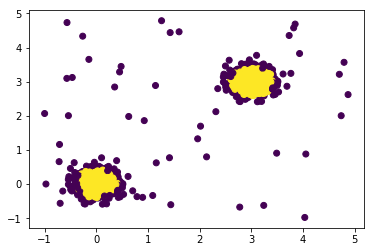

In [5]:
train_and_plot()

### `contamination`
> *contamination: float in (0., 0.5), optional (default=0.1)*
> The amount of contamination of the data set, i.e. the proportion of outliers in the data set. Used when fitting to define the threshold on the decision function. If ‘auto’, the decision function threshold is determined as in the original paper.

#### Reduce contamination

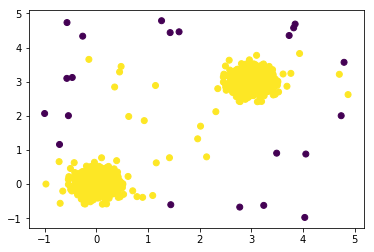

In [6]:
train_and_plot(contamination=0.01)

#### Increase contamination

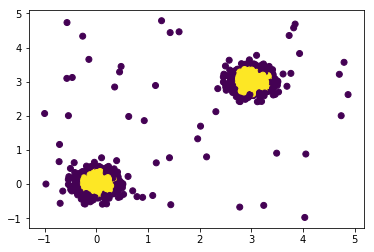

In [7]:
train_and_plot(contamination=0.25)

### `max_samples`

>*max_samples : int or float, optional (default=”auto”).* 
>The number of samples to draw from X to train each base estimator.
>- If int, then draw max_samples samples.
>- If float, then draw max_samples * X.shape[0] samples.
>- If “auto”, then max_samples=min(256, n_samples).
>- If max_samples is larger than the number of samples provided, all samples will be used for all trees (no sampling).

#### Reduce `max_samples`

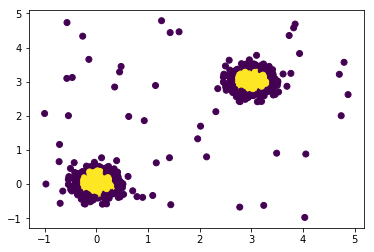

In [8]:
train_and_plot(max_samples=50)

#### Increase `max_samples`

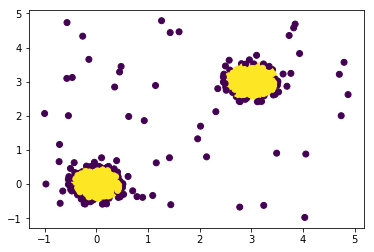

In [9]:
train_and_plot(max_samples=500)

### TODO
- Extended Isolation Forest
- Anomaly score maps